# Uebung 5

## Aufgabe 1

Erstellen Sie ein GeoDataFrame mit einem Polygon resp. Multipolygon pro Kanton aus dem swissBOUNDARIES3D Datensatz (TLM_KANTONSGEBIET).

Tipp: 

    gs = gpd.GeoSeries([geom1, geom2, geom3, geom4, ...])
    df = pd.DataFrame([attrib1, attrib2, attrib3, attrib4, ... ])
    gdf = gpd.GeoDataFrame(df, geometry=gs)


In [1]:
import geopandas as gpd
import pandas as pd
import shapely
import geopandas_stac as stac

In [2]:
# Basis-Pfad ggf. anpassen
basedir = "/data/geo/opengeodata/BOUNDARIES_2021_04/DATEN/swissBOUNDARIES3D/"

gdb = basedir + "FGDB/swissBOUNDARIES3D_1_3_LV95_LN02.gdb"

In [3]:
import fiona

fiona.listlayers(gdb)

['TLM_LANDESGEBIET',
 'TLM_KANTONSGEBIET',
 'TLM_HOHEITSGRENZE',
 'TLM_HOHEITSGEBIET',
 'TLM_BEZIRKSGEBIET']

In [23]:
alle_kantonsteile = gpd.read_file(gdb, driver='FileGDB', layer="TLM_KANTONSGEBIET")

In [24]:
kantone = alle_kantonsteile.NAME.unique()
kantone

array(['Graubünden', 'Bern', 'Valais', 'Vaud', 'Ticino', 'St. Gallen',
       'Zürich', 'Fribourg', 'Luzern', 'Aargau', 'Uri', 'Thurgau',
       'Schwyz', 'Jura', 'Neuchâtel', 'Solothurn', 'Glarus',
       'Basel-Landschaft', 'Obwalden', 'Nidwalden', 'Genève',
       'Schaffhausen', 'Appenzell Ausserrhoden', 'Zug',
       'Appenzell Innerrhoden', 'Basel-Stadt'], dtype=object)

In [25]:
alle_kantonsteile.head()

,UUID,DATUM_AENDERUNG,DATUM_ERSTELLUNG,ERSTELLUNG_JAHR,ERSTELLUNG_MONAT,REVISION_JAHR,REVISION_MONAT,GRUND_AENDERUNG,HERKUNFT,HERKUNFT_JAHR,...,SEE_FLAECHE,REVISION_QUALITAET,KANTONSFLAECHE,KANTON_TEIL,NAME,ICC,EINWOHNERZAHL,Shape_Length,Shape_Area,geometry
0,{0B2364ED-49E0-4D53-A33C-C684DD530B57},2018-11-22T13:38:04,2012-10-26T12:21:31,2012,10,2021,4,400,500,2019,...,NaN,2020_Aufbau,710530.0,0,Graubünden,CH,199021.0,758037.412184,7.105296e+09,MULTIPOLYGON Z (((2735215.665 1194955.161 2870...
1,{DDD56CEF-0E61-4EED-85ED-F67A459C93ED},2019-11-06T07:57:58,2012-10-26T12:21:31,2012,10,2021,4,400,100,2019,...,11897.0,2020_Aufbau,595951.0,1,Bern,CH,1039474.0,747009.909625,5.950465e+09,MULTIPOLYGON Z (((2595241.510 1169313.283 2090...
2,{54B25E50-30A7-4995-ADE3-5FFF6E13A995},2018-11-22T13:38:04,2012-10-26T12:21:31,2012,10,2021,4,400,500,2019,...,1060.0,2020_Aufbau,522463.0,0,Valais,CH,345525.0,549337.990148,5.224632e+09,MULTIPOLYGON Z (((2601807.628 1136116.778 2948...
3,{921DFEF2-6D91-4CB8-9CFC-2A831C412020},2019-11-06T07:57:58,2012-10-26T12:21:31,2012,10,2021,4,400,100,2019,...,39097.0,2020_Aufbau,321202.0,1,Vaud,CH,805098.0,566188.553337,3.118553e+09,MULTIPOLYGON Z (((2555092.813 1138713.419 372....
4,{95F10F52-8B2F-4D6A-AF7E-D4F915E42F89},2020-11-19T10:37:08,2012-10-26T12:21:31,2012,10,2021,4,400,500,2020,...,7147.0,2020_Aufbau,281215.0,0,Ticino,CH,351491.0,363081.089239,2.812148e+09,MULTIPOLYGON Z (((2727358.511 1119219.094 1351...


In [49]:
from shapely.geometry import mapping, shape

schweiz = gpd.GeoDataFrame()

geometrie = {}

for kanton in kantone:
    kantons_df = alle_kantonsteile[alle_kantonsteile['NAME']==kanton]

    geometrie[kanton] = kantons_df["geometry"].unary_union

    #print(geometrie)

    #gs = gpd.GeoSeries([geometrie])
    #df = pd.DataFrame([kantons_df['properties']])
    #gdf = gpd.GeoDataFrame(df, geometry=gs)
    
    #schweiz.append(gdf)

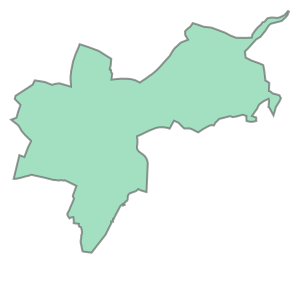

In [56]:
kantons_df["geometry"].unary_union

In [53]:
alle_kantonsteile.columns

Index(['UUID', 'DATUM_AENDERUNG', 'DATUM_ERSTELLUNG', 'ERSTELLUNG_JAHR',
       'ERSTELLUNG_MONAT', 'REVISION_JAHR', 'REVISION_MONAT',
       'GRUND_AENDERUNG', 'HERKUNFT', 'HERKUNFT_JAHR', 'HERKUNFT_MONAT',
       'OBJEKTART', 'KANTONSNUMMER', 'SEE_FLAECHE', 'REVISION_QUALITAET',
       'KANTONSFLAECHE', 'KANTON_TEIL', 'NAME', 'ICC', 'EINWOHNERZAHL',
       'Shape_Length', 'Shape_Area', 'geometry'],
      dtype='object')

In [50]:
geometrie

{'Graubünden': <shapely.geometry.polygon.Polygon at 0x7f2f1f80e690>,
 'Bern': <shapely.geometry.multipolygon.MultiPolygon at 0x7f2f1fa3fa50>,
 'Valais': <shapely.geometry.polygon.Polygon at 0x7f2f25e32e50>,
 'Vaud': <shapely.geometry.multipolygon.MultiPolygon at 0x7f2f1f6f8510>,
 'Ticino': <shapely.geometry.polygon.Polygon at 0x7f2f1f6f8190>,
 'St. Gallen': <shapely.geometry.multipolygon.MultiPolygon at 0x7f2f1f6f8890>,
 'Zürich': <shapely.geometry.polygon.Polygon at 0x7f2f1f6f8d50>,
 'Fribourg': <shapely.geometry.multipolygon.MultiPolygon at 0x7f2f1f6f8250>,
 'Luzern': <shapely.geometry.polygon.Polygon at 0x7f2f1f6f8dd0>,
 'Aargau': <shapely.geometry.multipolygon.MultiPolygon at 0x7f2f1f6f8b90>,
 'Uri': <shapely.geometry.polygon.Polygon at 0x7f2f1f6f87d0>,
 'Thurgau': <shapely.geometry.multipolygon.MultiPolygon at 0x7f2f1f8253d0>,
 'Schwyz': <shapely.geometry.polygon.Polygon at 0x7f2f1f825d10>,
 'Jura': <shapely.geometry.polygon.Polygon at 0x7f2f1f825b10>,
 'Neuchâtel': <shapely.geome

In [55]:
gpd.GeoDataFrame()

ValueError: arrays must all be same length

In [54]:
gs = gpd.GeoSeries([geometrie])
#df = pd.DataFrame([df['properties']])
gdf = gpd.GeoDataFrame(alle_kantonsteile, geometry=gs)

/opt/anaconda3/envs/geopython/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  """Entry point for launching an IPython kernel.


TypeError: Input must be valid geometry objects: {'Graubünden': <shapely.geometry.polygon.Polygon object at 0x7f2f1f80e690>, 'Bern': <shapely.geometry.multipolygon.MultiPolygon object at 0x7f2f1fa3fa50>, 'Valais': <shapely.geometry.polygon.Polygon object at 0x7f2f25e32e50>, 'Vaud': <shapely.geometry.multipolygon.MultiPolygon object at 0x7f2f1f6f8510>, 'Ticino': <shapely.geometry.polygon.Polygon object at 0x7f2f1f6f8190>, 'St. Gallen': <shapely.geometry.multipolygon.MultiPolygon object at 0x7f2f1f6f8890>, 'Zürich': <shapely.geometry.polygon.Polygon object at 0x7f2f1f6f8d50>, 'Fribourg': <shapely.geometry.multipolygon.MultiPolygon object at 0x7f2f1f6f8250>, 'Luzern': <shapely.geometry.polygon.Polygon object at 0x7f2f1f6f8dd0>, 'Aargau': <shapely.geometry.multipolygon.MultiPolygon object at 0x7f2f1f6f8b90>, 'Uri': <shapely.geometry.polygon.Polygon object at 0x7f2f1f6f87d0>, 'Thurgau': <shapely.geometry.multipolygon.MultiPolygon object at 0x7f2f1f8253d0>, 'Schwyz': <shapely.geometry.polygon.Polygon object at 0x7f2f1f825d10>, 'Jura': <shapely.geometry.polygon.Polygon object at 0x7f2f1f825b10>, 'Neuchâtel': <shapely.geometry.polygon.Polygon object at 0x7f2f1f825590>, 'Solothurn': <shapely.geometry.multipolygon.MultiPolygon object at 0x7f2f1f825310>, 'Glarus': <shapely.geometry.polygon.Polygon object at 0x7f2f1f825410>, 'Basel-Landschaft': <shapely.geometry.multipolygon.MultiPolygon object at 0x7f2f1f825750>, 'Obwalden': <shapely.geometry.multipolygon.MultiPolygon object at 0x7f2f1f825250>, 'Nidwalden': <shapely.geometry.polygon.Polygon object at 0x7f2f1f825dd0>, 'Genève': <shapely.geometry.multipolygon.MultiPolygon object at 0x7f2f1f825c50>, 'Schaffhausen': <shapely.geometry.multipolygon.MultiPolygon object at 0x7f2f1f825a50>, 'Appenzell Ausserrhoden': <shapely.geometry.polygon.Polygon object at 0x7f2f1f825390>, 'Zug': <shapely.geometry.polygon.Polygon object at 0x7f2f1f825510>, 'Appenzell Innerrhoden': <shapely.geometry.multipolygon.MultiPolygon object at 0x7f2f1f6f8e50>, 'Basel-Stadt': <shapely.geometry.polygon.Polygon object at 0x7f2f1fa3ef10>}

In [35]:
alle_kantone[alle_kantone['NAME']==kanton]
kanton
alle_kantone

<open Collection '/data/geo/opengeodata/BOUNDARIES_2021_04/DATEN/swissBOUNDARIES3D/FGDB/swissBOUNDARIES3D_1_3_LV95_LN02.gdb:TLM_KANTONSGEBIET', mode 'r' at 0x7f2f1f822ed0>

In [5]:
df_sg = df.query("NAME == 'St. Gallen'")

In [8]:
df_sg

,UUID,DATUM_AENDERUNG,DATUM_ERSTELLUNG,ERSTELLUNG_JAHR,ERSTELLUNG_MONAT,REVISION_JAHR,REVISION_MONAT,GRUND_AENDERUNG,HERKUNFT,HERKUNFT_JAHR,...,SEE_FLAECHE,REVISION_QUALITAET,KANTONSFLAECHE,KANTON_TEIL,NAME,ICC,EINWOHNERZAHL,Shape_Length,Shape_Area,geometry
5,{05D55405-466B-4ECC-83C7-A906DEB0D607},2017-12-04T12:14:20,2012-10-26T12:21:31,2012,10,2021,4,400,100,2018,...,7720.0,2020_Aufbau,202820.0,1,St. Gallen,CH,510734.0,494022.291961,2.028094e+09,MULTIPOLYGON Z (((2716175.426 1240719.199 835....
46,{F1A07951-AC8B-4EBA-B48F-64BC8B92228C},2015-12-08T15:35:39,2012-10-26T12:21:31,2012,10,2021,4,400,500,2015,...,NaN,2020_Aufbau,NaN,2,St. Gallen,CH,NaN,1481.818673,1.054074e+05,MULTIPOLYGON Z (((2744262.515 1264100.855 462....


<AxesSubplot:>

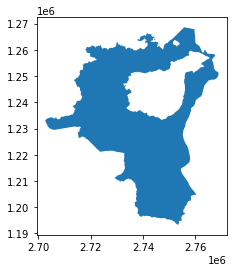

In [9]:
df_sg.plot()

<AxesSubplot:>

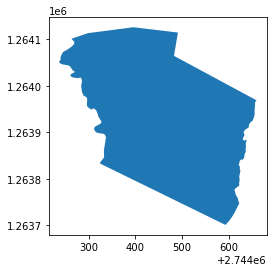

In [12]:
df_sg[df_sg['KANTON_TEIL']==2].plot()

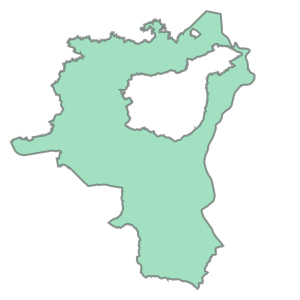

In [13]:
polygon_sg = df_sg["geometry"].unary_union
polygon_sg

In [ ]:
gs = gpd.GeoSeries([geom1, geom2, geom3, geom4, ...])
df = pd.DataFrame([attrib1, attrib2, attrib3, attrib4, ... ])
gdf = gpd.GeoDataFrame(df, geometry=gs)


## Aufgabe 2

Erstellen Sie ein GeoDataFrame mit den Gebäudegrundrissen von Gebäuden mit Erstellungsjahr ab 2020 aus dem swissTLM3D Datensatz (Layer TLM_GEBAEUDE_FOOTPRINT).

Exportieren Sie dieses in ein Shapefile oder GeoPackage and stellen Sie diesen Datensatz in einem GIS dar.


Tipp:

Exportieren in ein Shapefile:

    gdf.to_file("filenamme.shp")
    
Exportieren in ein GeoPackage:

    gdf.to_file("filename.gpkg", layer='layername', driver="GPKG")



In [59]:
basedir = "/data/geo/opengeodata/2021_SWISSTLM3D_FGDB101_CHLV95_LN02/"

gdb = basedir + "SWISSTLM3D_2021_LV95_LN02.gdb"

In [64]:
alle_gebaeude = gpd.read_file(gdb, driver='FileGDB', layer="TLM_GEBAEUDE_FOOTPRINT")

In [65]:
alle_gebaeude.head()

,UUID,DATUM_AENDERUNG,DATUM_ERSTELLUNG,ERSTELLUNG_JAHR,ERSTELLUNG_MONAT,REVISION_JAHR,REVISION_MONAT,GRUND_AENDERUNG,HERKUNFT,HERKUNFT_JAHR,HERKUNFT_MONAT,REVISION_QUALITAET,OBJEKTART,NUTZUNG,TLM_BAUTEN_NAME_UUID,NAME,SHAPE_Length,SHAPE_Area,geometry
0,{B05C93DB-C88D-47AD-A842-638A95C8E718},2021-01-27T10:36:42,2008-03-19T00:00:00,2002,6,2019,6,400,100,2019,6,2020_Akt,0,Schiessstand,{41C949A2-9F7B-41EE-93FD-631B76F2176D},Altdorf 300m,45.023875,125.470437,MULTIPOLYGON Z (((2691247.085 1293510.989 523....
1,{E00FC588-4B87-4CA3-929F-1D661F403A48},2016-07-19T17:18:33,2008-03-19T00:00:00,2002,6,2019,6,400,100,2015,6,2020_Akt,13,None,None,None,57.181806,169.273016,MULTIPOLYGON Z (((2691748.151 1292579.049 564....
2,{5F7B85E4-C25D-4628-85E1-D7921263E4F0},2021-01-27T10:36:42,2008-03-19T00:00:00,2002,6,2019,6,400,100,2019,6,2020_Akt,0,Schiessstand,{48B41C1A-70FA-4E66-9481-7BE67F7FA377},Bibern 300m,40.718309,101.179452,MULTIPOLYGON Z (((2692364.981 1292481.613 497....
3,{EDB0B4EF-690D-45B0-B286-595340E98328},2021-01-27T10:36:42,2008-03-19T00:00:00,2002,6,2019,6,400,100,2019,6,2020_Akt,0,None,None,None,29.358909,53.211138,MULTIPOLYGON Z (((2696485.566 1290693.194 498....
4,{C0C2F402-CCC0-42D0-8B9A-0FE10BF45468},2021-01-27T10:36:42,2008-03-19T00:00:00,2002,6,2019,6,400,100,2019,6,2020_Akt,0,Schiessstand,{2340EE3E-EB38-421E-898E-2EB63E0C7A47},Lohn 300m,38.948114,94.173299,MULTIPOLYGON Z (((2691563.945 1290625.531 609....


In [60]:
import fiona

footprint_layer = fiona.open(gdb, 'r', layer='TLM_GEBAEUDE_FOOTPRINT')

i = iter(footprint_layer)

i['element']['']

footprint = next(i)
footprint

{'type': 'Feature',
 'id': '1',
 'properties': OrderedDict([('UUID', '{B05C93DB-C88D-47AD-A842-638A95C8E718}'),
              ('DATUM_AENDERUNG', '2021-01-27T10:36:42'),
              ('DATUM_ERSTELLUNG', '2008-03-19T00:00:00'),
              ('ERSTELLUNG_JAHR', 2002),
              ('ERSTELLUNG_MONAT', 6),
              ('REVISION_JAHR', 2019),
              ('REVISION_MONAT', 6),
              ('GRUND_AENDERUNG', 400),
              ('HERKUNFT', 100),
              ('HERKUNFT_JAHR', 2019),
              ('HERKUNFT_MONAT', 6),
              ('REVISION_QUALITAET', '2020_Akt'),
              ('OBJEKTART', 0),
              ('NUTZUNG', 'Schiessstand'),
              ('TLM_BAUTEN_NAME_UUID',
               '{41C949A2-9F7B-41EE-93FD-631B76F2176D}'),
              ('NAME', 'Altdorf 300m'),
              ('SHAPE_Length', 45.023875051788735),
              ('SHAPE_Area', 125.47043700012277)]),
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[(2691247.085000001, 1293510.989, 523.44000

In [63]:
footprint_layer

<open Collection '/data/geo/opengeodata/2021_SWISSTLM3D_FGDB101_CHLV95_LN02/SWISSTLM3D_2021_LV95_LN02.gdb:TLM_GEBAEUDE_FOOTPRINT', mode 'r' at 0x7f2f1f6fdf90>

In [61]:
from shapely.geometry import mapping, shape

geom = shape(footprint['geometry'])


In [ ]:
gs = gpd.GeoSeries([geom])
df = pd.DataFrame([footprint['properties']])
gdf = gpd.GeoDataFrame(df, geometry=gs)